# Functional margins

y = [ 1  1 -1 -1]
x = [4 6 1 2]


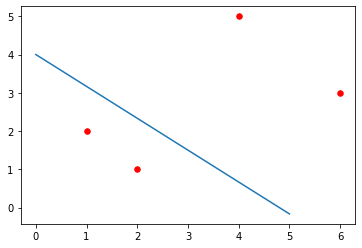

In [24]:
import numpy as np
import matplotlib.pyplot as plt


y = np.array([1,1,-1,-1])
x = np.array([[4,5],
             [6,3],
             [1,2],
             [2,1]])

print('y =', y)
print('x =', x[:,0])
xa = np.array([1,2,3])
xb = np.array([4,2,8])
plt.scatter(x[:,0], x[:,1], s=30, facecolors='r', edgecolors='r')
x = np.arange(0, 6)
y = -5/6*x+4

# Plot the points using matplotlib
plt.plot(x, y)


# SVM with numpy sklearn
https://scikit-learn.org/stable/modules/svm.html

In [23]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)
svm.SVC()

SVC()

After being fitted, the model can then be used to predict new values:

In [135]:
clf.predict([[2., 2.]])


array([1])

SVMs decision function (detailed in the Mathematical formulation) depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in attributes support_vectors_, support_ and n_support_:

In [25]:
# get support vectors
clf.support_vectors_
array([[0., 0.],
       [1., 1.]])
# get indices of support vectors
clf.support_

# get number of support vectors for each class
clf.n_support_


NameError: name 'array' is not defined

# Spectral Clustering
The example data from https://de.wikipedia.org/wiki/Spektrales_Clustering

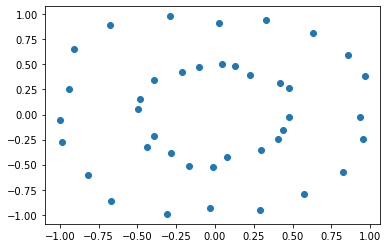

In [264]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

X = np.array([[5,-3],[2,-4],[-2,-1],[-3,0],[-2,-2],[-2,4],[1,2],[1,4]])
#X = np.array([[2,1,0], [4,5,-1],[1,1,1]])
X, y = make_circles(n_samples=40, factor=0.5, noise=0.05)
plt.scatter(X[:,0],X[:,1])       

In [274]:
# D the adjacency matrix with euclidean distance
# S the radial kernel similiarites matrix
# c the scalar parameter
# k number of clusters
k = 2
c = 0.01

start = time.time()

D = np.zeros((X.shape[0],X.shape[0]))
for i,vi in enumerate(X):
    for j,vj in enumerate(X):
        d = np.linalg.norm(vi-vj) # vi, vj the vertices in X
        D[i,j]=d

W = np.exp(-D*D/c) # the adjacency Matrix of edge weights
g = np.array([np.sum(row) for row in W])
G = np.diag(g)

L = G-W  
w,v = np.linalg.eig(L)

i = np.argsort(w)[:k] # k first sorted indices
# Z: A matrix of shape [n, k] with k eigenvectors corresponding to k smallest eigenvalues of L in columns
Z = v[:,i]

km = KMeans(n_clusters=k)
assign = km.fit_predict(Z)
print('assign ', assign)

exec_time = time.time()-start
print('Execution time: {}s'.format(exec_time))



assign  [1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0
 1 0 1]
Execution time: 0.040998220443725586s


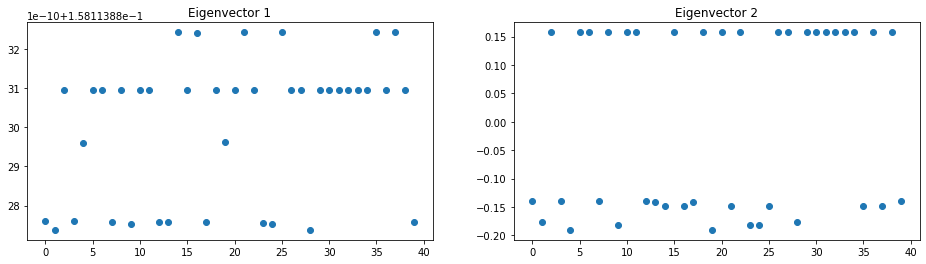

In [275]:
first_eigenvector = Z[:, 0]
second_eigenvector = Z[:, 1]

plt.figure(figsize=(16, 4))
for i, v in enumerate([first_eigenvector, second_eigenvector]):
    plt.subplot(1, 2, i + 1)
    plt.scatter(np.arange(v.size), v)
    plt.title("Eigenvector {}".format(i + 1))

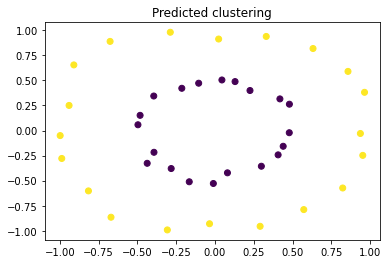

In [276]:
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c = assign)
plt.title("Predicted clustering")
plt.show()